In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd

'C:\\Users\\ihsan\\OneDrive\\Desktop\\globalaihub transfer learner'

In [3]:
my_data_dir='C:\\Users\\ihsan\\OneDrive\\Desktop\\globalaihub transfer learner\\PetImages'

In [4]:
os.listdir(my_data_dir)

['test', 'train', 'validation']

In [5]:
val_path = my_data_dir+'\\validation\\'
train_path = my_data_dir+'\\train\\'
test_path = my_data_dir+'\\test\\'

In [6]:
os.listdir(train_path)

['Cat', 'Dog']

In [7]:
len(os.listdir(test_path))

4993

In [69]:
len(os.listdir(train_path+'\\cat'))

8000

In [8]:
len(os.listdir(train_path+'\\cat')) 

8000

In [9]:
len(os.listdir(train_path+'\\dog'))

8000

In [10]:
os.listdir(train_path+'Cat')[0]

'0.jpg'

In [11]:
os.listdir(train_path+'Dog')

['10000.jpg',
 '10001.jpg',
 '10002.jpg',
 '10003.jpg',
 '10004.jpg',
 '10005.jpg',
 '10006.jpg',
 '10007.jpg',
 '10008.jpg',
 '10009.jpg',
 '10010.jpg',
 '10011.jpg',
 '10012.jpg',
 '10013.jpg',
 '10014.jpg',
 '10015.jpg',
 '10016.jpg',
 '10017.jpg',
 '10018.jpg',
 '10019.jpg',
 '10020.jpg',
 '10021.jpg',
 '10022.jpg',
 '10023.jpg',
 '10024.jpg',
 '10025.jpg',
 '10026.jpg',
 '10027.jpg',
 '10028.jpg',
 '10029.jpg',
 '10030.jpg',
 '10031.jpg',
 '10032.jpg',
 '10033.jpg',
 '10034.jpg',
 '10035.jpg',
 '10036.jpg',
 '10037.jpg',
 '10038.jpg',
 '10039.jpg',
 '10040.jpg',
 '10041.jpg',
 '10042.jpg',
 '10043.jpg',
 '10044.jpg',
 '10045.jpg',
 '10046.jpg',
 '10047.jpg',
 '10048.jpg',
 '10049.jpg',
 '10050.jpg',
 '10051.jpg',
 '10052.jpg',
 '10053.jpg',
 '10054.jpg',
 '10055.jpg',
 '10056.jpg',
 '10057.jpg',
 '10058.jpg',
 '10059.jpg',
 '10060.jpg',
 '10061.jpg',
 '10062.jpg',
 '10063.jpg',
 '10064.jpg',
 '10065.jpg',
 '10066.jpg',
 '10067.jpg',
 '10068.jpg',
 '10069.jpg',
 '10070.jpg',
 '1007

In [12]:
path1=train_path+'/cat'+'/0.jpg'
path2=train_path+'/dog'+'/10000.jpg'

In [13]:
cat_img=imread(path1)
dog_img=imread(path2)

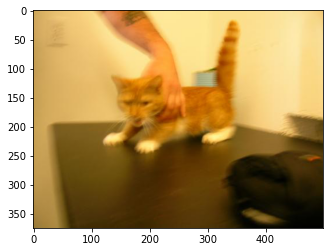

In [14]:
plt.imshow(cat_img)

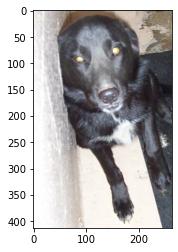

In [15]:
plt.imshow(dog_img)

**Let's decide on the final dimension of these images.**

In [16]:
cat_img.shape

(375, 500, 3)

In [17]:
dog_img.shape

(413, 263, 3)

In [71]:
img.shape

(375, 500, 3)

In [18]:
image_shape = (128,128,3)
# I've equalized the size of all photos to a value.

# it will fill the edges of images smaller than 128 with 0s
# it will crop images larger than this to 128,128.

In [19]:
cat_img.max()

255

In [20]:
dog_img.max()

255

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

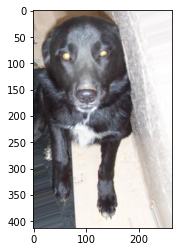

In [23]:
plt.imshow(image_gen.random_transform(dog_img))

# Generating many manipulated images from a directory

In [24]:
image_gen.flow_from_directory(val_path)

Found 4007 images belonging to 2 classes.


In [25]:
image_gen.flow_from_directory(test_path)

Found 0 images belonging to 0 classes.


In [26]:
image_gen.flow_from_directory(train_path)

Found 15998 images belonging to 2 classes.


# Creating the Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [28]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))


model.add(Dropout(0.5))


model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

# Early Stopping

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [32]:
batch_size = 16

In [33]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 15998 images belonging to 2 classes.


In [34]:
val_image_gen = image_gen.flow_from_directory(val_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 4007 images belonging to 2 classes.


In [35]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 0 images belonging to 0 classes.


In [36]:
train_image_gen.class_indices

{'Cat': 0, 'Dog': 1}

In [37]:
test_image_gen.class_indices

{}

# Model Training

In [38]:
train_image_gen

In [39]:
val_image_gen

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
results = model.fit_generator(train_image_gen,epochs=10,
                              validation_data=val_image_gen,
                             callbacks=[early_stop])

Epoch 1/10
1000/1000 [==============================] - 250s 250ms/step - loss: 0.6854 - accuracy: 0.5618 - val_loss: 0.6714 - val_accuracy: 0.5975
Epoch 2/10
1000/1000 [==============================] - 243s 243ms/step - loss: 0.6382 - accuracy: 0.6373 - val_loss: 0.5896 - val_accuracy: 0.6978
Epoch 3/10
1000/1000 [==============================] - 243s 243ms/step - loss: 0.5750 - accuracy: 0.7094 - val_loss: 0.5266 - val_accuracy: 0.7305
Epoch 4/10
1000/1000 [==============================] - 244s 244ms/step - loss: 0.5348 - accuracy: 0.7365 - val_loss: 0.4987 - val_accuracy: 0.7547
Epoch 5/10
1000/1000 [==============================] - 523s 523ms/step - loss: 0.5015 - accuracy: 0.7559 - val_loss: 0.4958 - val_accuracy: 0.7542
Epoch 6/10
1000/1000 [==============================] - 240s 239ms/step - loss: 0.4818 - accuracy: 0.7728 - val_loss: 0.4658 - val_accuracy: 0.7784
Epoch 7/10
1000/1000 [==============================] - 242s 242ms/step - loss: 0.4614 - accuracy: 0.7832 - val_

# Evaluating the Model

In [43]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.685428,0.561758,0.671413,0.597454
1,0.638222,0.637330,0.589559,0.697779
2,0.574970,0.709401,0.526610,0.730472
3,0.534788,0.736530,0.498749,0.754679
4,0.501527,0.755907,0.495794,0.754180
5,0.481814,0.772847,0.465769,0.778388
6,0.461351,0.783223,0.448273,0.794609
7,0.453385,0.786848,0.488409,0.754430
8,0.436850,0.801288,0.425193,0.808335
9,0.425458,0.806351,0.435255,0.799102


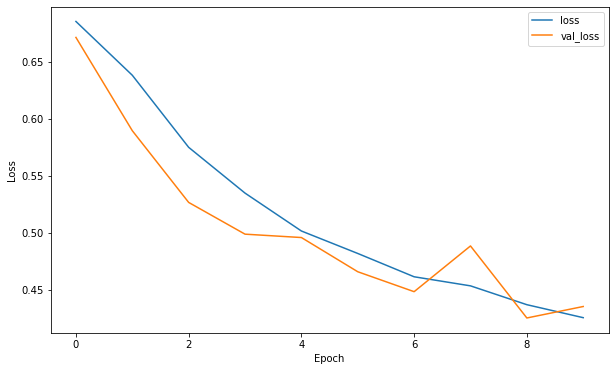

In [44]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

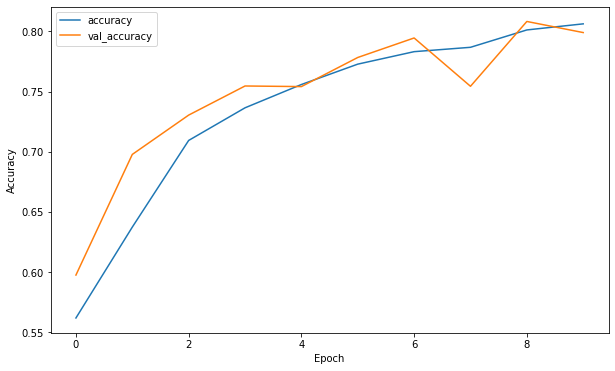

In [45]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [46]:
model.metrics_names

['loss', 'accuracy']

In [47]:
model.evaluate_generator(val_image_gen)

[0.4311045706272125, 0.7991015911102295]

In [48]:
pred_probabilities = model.predict_generator(val_image_gen)

In [49]:
pred_probabilities

array([[0.24951068],
       [0.01254913],
       [0.01276103],
       ...,
       [0.7757503 ],
       [0.9403651 ],
       [0.6904893 ]], dtype=float32)

In [50]:
val_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [51]:
predictions = pred_probabilities > 0.5

In [52]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(classification_report(val_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1998
           1       0.87      0.73      0.79      2009

    accuracy                           0.81      4007
   macro avg       0.82      0.81      0.81      4007
weighted avg       0.82      0.81      0.81      4007



In [55]:
confusion_matrix(val_image_gen.classes,predictions)

array([[1774,  224],
       [ 549, 1460]], dtype=int64)

In [ ]:
#from tensorflow.keras.models import load_model
#model.save('cat_dog_detector.h5')